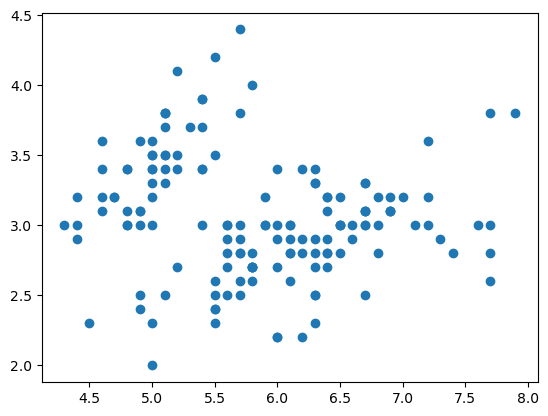

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn import metrics
data = load_iris()
features = data.data
label = data.target
X_train, X_test,y_train,y_test = train_test_split(features,label,test_size = 0.4,random_state = 0)
clf = svm.SVC(kernel = 'linear', C=1)

plt.scatter(features[:,0],features[:,1])

In [2]:
param = {'C':[1,10,100,1000],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}
grid = GridSearchCV(clf,param ,refit = True,verbose = 1,cv= 5,n_jobs = -1)
grid_search = grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [3]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [4]:
grid_search.best_score_

0.9888888888888889

In [5]:
y_pred = grid.predict(X_test)

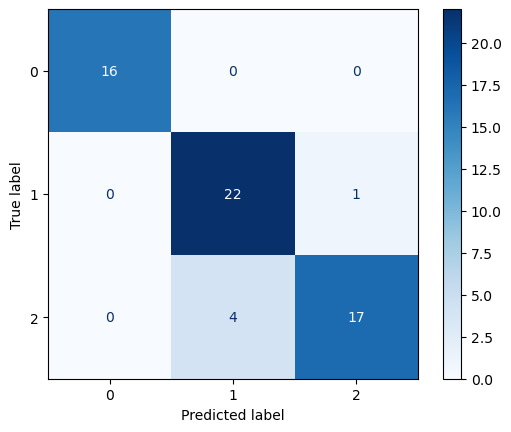

In [6]:
cm = metrics.confusion_matrix(y_test,y_pred)
disp = metrics.ConfusionMatrixDisplay(cm,display_labels = grid.classes_)
disp.plot(cmap = plt.cm.Blues, ax =  plt.gca())

In [7]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.85      0.96      0.90        23
           2       0.94      0.81      0.87        21

    accuracy                           0.92        60
   macro avg       0.93      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



In [8]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print('Accuracy of SVM with Hold out validation:\n',round(accuracy*100,2))

Accuracy of SVM with Hold out validation:
 96.67


In [9]:
scores = cross_val_score(clf, features,label,cv=10)
print('Accuracy of SVM with cross validation is:\n',round(scores.mean()*100,2))

Accuracy of SVM with cross validation is:
 97.33
